In [ ]:
# Problem Statement

# We have list of products bought by each customers. We have to use the assosciate rule mining to find the relation 
# between products and the probability of buying a product A when prodcut B is already bought. So that, with optimal 
# support and confidence we can make offer for those products to increase the sale quantity. Ignore if products have high 
# support and confidence.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install apyori package
!pip install apyori

In [3]:
# Association Rule Mining
from apyori import apriori

In [15]:
# Reading the dataset with no header

dataset = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Shape of dataset
dataset.shape

(7501, 20)

# Data-preprocessing

In [37]:
# Create an empty list and append the products bought by each customer to separate list

transaction = []

for i in range(0,7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0,20)])
    


In [39]:
# Printing the top 20 customers 
print(transaction[0:20])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

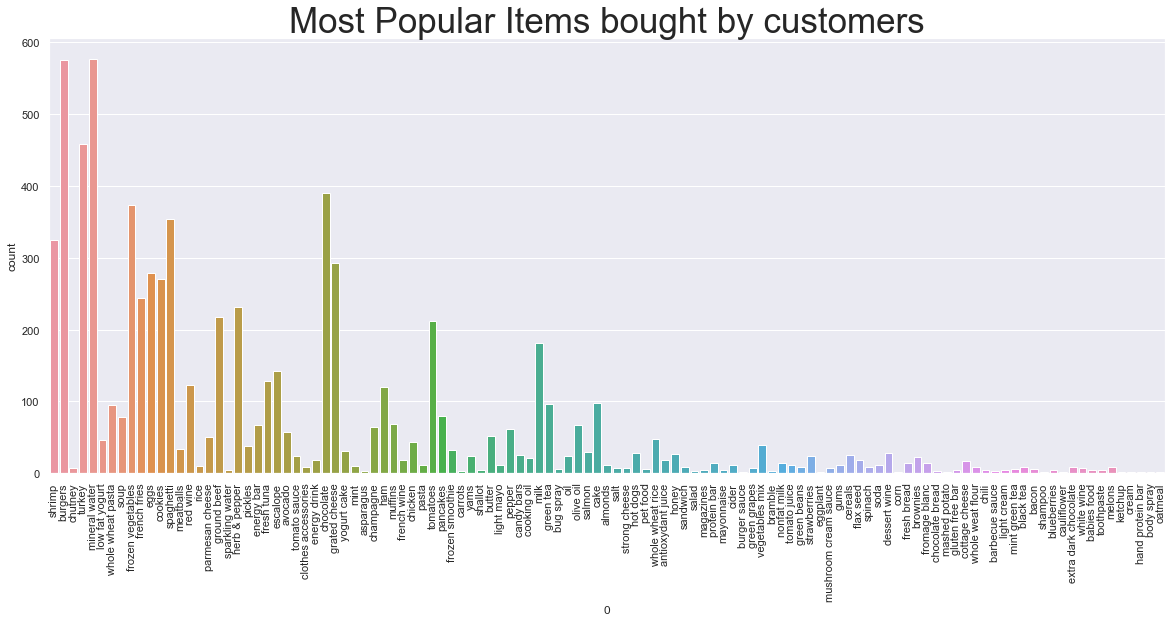

In [40]:
# Plotting the count of products bought

plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(dataset[0])
plt.title("Most Popular Items bought by customers", fontsize=35)
plt.xticks(rotation= 90)
plt.show()


# Building Association Rule Mining

In [46]:
# support= 0 to 1 , confidence = 0.3,0.4,0.2 , lift > 2 , leng = 2 
# Creating apriori object
# Passing parameters with support as 0.01,confidendce 0.2 and lift =2 so that model will filter those combinations with
# lift >2 where we can look to apply the offers
# min length gives atlest 2 combinations of products

rules = apriori(transaction, min_support=0.01, min_confidence=0.2, min_lift = 2, min_lenght=2)

In [47]:
rules

<generator object apriori at 0x0000026AB73EF740>

In [48]:
# We have got a list of products with respective support, confidence and lift values
results = list(rules)
results1 = results.copy()
results1

[RelationRecord(items=frozenset({'shrimp', 'frozen vegetables'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'ground beef', 'grated cheese'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro

In [49]:
# Printing the values for better view

ls= []
for item in results1:
    pair = item[0]
    pair1 = [x for x in pair]
    ls.append(f'{pair1[0]}--> {pair1[1]}')
    ls.append(f'Support:{item[1]}')
    ls.append(f'Confidence:{item[2][0][2]}')
    ls.append(f'Lift:{item[2][0][3]}')
    ls.append('***********')
    

In [52]:
# We extracted the product combinations which are suitable to provide offers which says that the high probability of buying 
# one product when other is bought which has optimal confidence and support values 

ls

['shrimp--> frozen vegetables',
 'Support:0.01666444474070124',
 'Confidence:0.23320895522388058',
 'Lift:2.44657394843962',
 '***********',
 'tomatoes--> frozen vegetables',
 'Support:0.0161311825089988',
 'Confidence:0.23586744639376217',
 'Lift:2.4744639376218323',
 '***********',
 'ground beef--> grated cheese',
 'Support:0.011331822423676844',
 'Confidence:0.2162849872773537',
 'Lift:2.201294015695292',
 '***********',
 'ground beef--> herb & pepper',
 'Support:0.015997866951073192',
 'Confidence:0.3234501347708895',
 'Lift:3.2919938411349285',
 '***********',
 'ground beef--> olive oil',
 'Support:0.014131449140114652',
 'Confidence:0.2145748987854251',
 'Lift:2.183889166607156',
 '***********',
 'ground beef--> spaghetti',
 'Support:0.03919477403012932',
 'Confidence:0.3989145183175034',
 'Lift:2.291162176033379',
 '***********',
 'soup--> milk',
 'Support:0.015197973603519531',
 'Confidence:0.3007915567282322',
 'Lift:2.3212319619531585',
 '***********',
 'red wine--> spaghetti